# Stochastic: Steady-State Probability, Markov Chains and Network

Visualization

Understanding Markov Chains: Why They Matter in Data Science

Kabui, Charles  
2025-04-14

In the world of data science, systems often evolve over time in ways
that depend only on their current state - not their entire history. This
concept is at the heart of **Markov chains**, a powerful mathematical
tool for modeling sequences of events where the next state depends only
on the current one. Whether you’re analyzing user behavior on a website,
modeling weather patterns, simulating queues, or building recommender
systems, Markov chains offer an elegant and effective way to understand
and predict dynamic systems.

At their core, Markov chains rely on **transition matrices** that define
the probability of moving from one state to another. By analyzing these
matrices, data scientists can compute **steady-state probabilities** - a
long-term distribution of where the system is likely to be. Simulating
these chains also allows us to observe patterns over time and visualize
how the system behaves dynamically.

## Steady-State Probability Calculation

You are given the following 3×3 transition matrix representing the state
changes of a system over time:

    P = [
      0.7  0.2  0.1
      0.3  0.4  0.3
      0.3  0.2  0.5
    ]

### Tasks:

1.  Represent the matrix in Python using NumPy.  
2.  Verify if this matrix is a valid stochastic matrix.  
3.  Compute the steady-state probabilities analytically using Python.

### Answer

#### Represent the matrix in Python using NumPy

In [105]:
import numpy as np

P = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.4, 0.3],
    [0.3, 0.2, 0.5]
])
P

array([[0.7, 0.2, 0.1],
       [0.3, 0.4, 0.3],
       [0.3, 0.2, 0.5]])

#### Verify if this matrix is a valid stochastic matrix

A stochastic matrix has non-negative entries and each row sums to 1.

In [106]:
# Check non-negativity
is_non_negative = np.all(P >= 0)

# Check if each row sums to 1
row_sums = np.sum(P, axis=1)
rows_sum_to_one = np.allclose(row_sums, 1)

is_valid_stochastic = is_non_negative and rows_sum_to_one
print("Valid stochastic matrix:", is_valid_stochastic)


Valid stochastic matrix: True

#### Compute the steady-state probabilities analytically using Python

Solve for `π` such that `πP = π` and `sum(π) = 1`

In [107]:
# Solve for steady-state vector π
A = P.T - np.eye(3)
A = np.vstack((A, np.ones(3)))
b = np.array([0, 0, 0, 1])

steady_state = np.linalg.lstsq(A, b, rcond=None)[0]
print("Steady-state probabilities:", steady_state)


Steady-state probabilities: [0.5  0.25 0.25]

Verify `πP = π`

In [108]:
steady_state

array([0.5 , 0.25, 0.25])

In [109]:
np.array_equal(
    np.round(np.dot(steady_state, P), 2),
    np.round(steady_state, 2))

True

## Markov Chain Simulation and Visualization

Using the same transition matrix **P** in question One, simulate a
Markov chain for **50 time steps**, starting from **state 0**.

### Tasks:

1.  Simulate the Markov chain and record the state at each time step.  
2.  Count how many times each state was visited.  
3.  Plot the sequence of visited states over time using matplotlib.  
4.  Visualize the frequency distribution of states visited using a bar
    plot.

### Answer

#### Simulate the Markov chain for 50 time steps starting from state 0

In [110]:
def simulate_markov_chain(P, start_state, steps):
    current_state = start_state
    states = [current_state]

    for _ in range(steps):
        current_state = np.random.choice(P.shape[0], p=P[current_state])
        states.append(int(current_state))

    return states

simulated_states = simulate_markov_chain(P, start_state=0, steps=50)

#### Count how many times each state was visited

In [111]:
from collections import Counter
import pandas as pd

state_counts = dict(Counter(simulated_states))
pd.DataFrame({ 
    "state": state_counts.keys(),
    "visit count": state_counts.values() 
}).set_index("state")

#### Plot the sequence of visited states over time using matplotlib

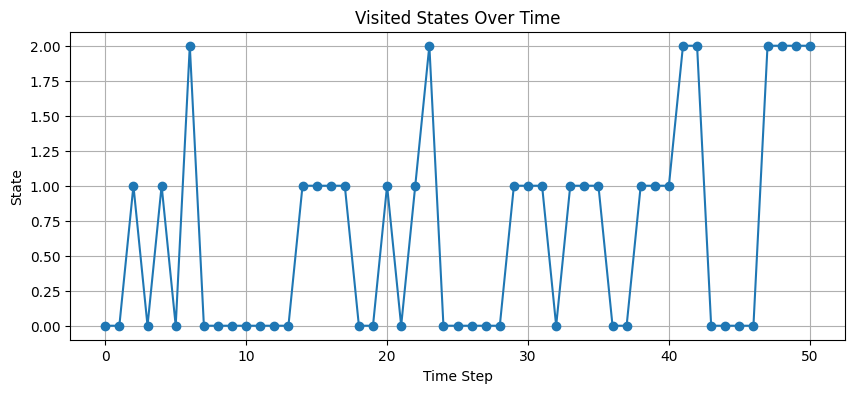

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(simulated_states, marker='o')
plt.title("Visited States Over Time")
plt.xlabel("Time Step")
plt.ylabel("State")
plt.grid(True)
plt.show()

#### Visualize the frequency distribution of states visited using a bar plot

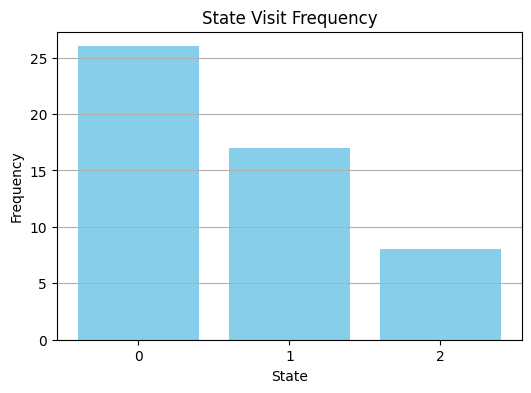

In [113]:
plt.figure(figsize=(6, 4))
plt.bar(state_counts.keys(), state_counts.values(), color='skyblue')
plt.title("State Visit Frequency")
plt.xlabel("State")
plt.ylabel("Frequency")
plt.xticks([0, 1, 2])
plt.grid(True, axis='y')
plt.show()

## Network Visualization of State Transitions

Using the transition matrix **P** in question One again, create a
directed graph of the Markov chain.

### Tasks:

1.  Use `networkx` to create a directed graph where:
    -   Nodes represent the states (0, 1, 2).  
    -   Edges represent transitions with weights corresponding to
        transition probabilities.  
2.  Draw the graph using `matplotlib`.  
3.  Use edge thickness or labels to indicate the strength of the
    transition probabilities.

### Answer

#### Create a directed graph using `networkx`

In [114]:
import networkx as nx

G = nx.DiGraph()

# Add nodes and edges with weights
for i in range(P.shape[0]):
    for j in range(P.shape[0]):
        if P[i, j] > 0:
            G.add_edge(i, j, weight=P[i, j])

#### Draw the graph using matplotlib with edge labels and thickness

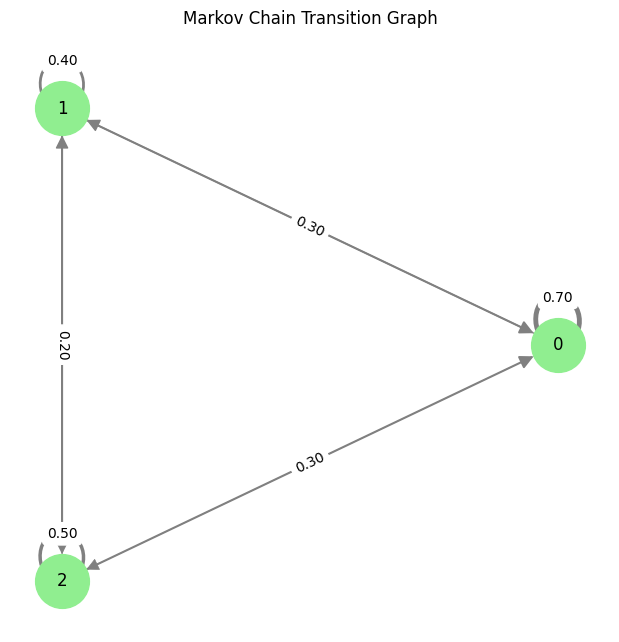

In [ ]:
pos = nx.circular_layout(G)
edge_weights = [
    G[u][v]['weight'] * 5 
    for u, v 
    in G.edges()
]

plt.figure(figsize=(6, 6))
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_color='lightgreen', 
    node_size=1500, 
    edge_color='gray', 
    width=edge_weights, 
    arrowsize=20)

# Add edge labels
edge_labels = {
    (u, v): f"{d['weight']:.2f}" 
    for u, v, d 
    in G.edges(data=True)
}
nx.draw_networkx_edge_labels(
    G, 
    pos, 
    edge_labels=edge_labels)

plt.title("Markov Chain Transition Graph")
plt.show()